<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Hometasks/Base/AI_HW1_Regression_with_inference_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (base)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

**Максимальная оценка за дз**
> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

**Задание 0 (0 баллов).**
Для чего фиксируем сиды в домашках?

`Для воспроизводимости - можно повторять и вопроизводить эксперимент в разное время и на разных машинах (с условием, что алгоритм генерации псевдослучайных чисел не меняется). Также это позвляет анализировать влияение других переменных на эксперимент, зафиксировав инициализацию весов, разделение на трейн и тест и т.д.`

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [2]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

df_train.dropna().to_csv('df_train.csv', index=False)
df_test.dropna().to_csv('df_test.csv', index=False)

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.55 балла)**

Выполните операции, направленные на практику основных действий с `pandas`:
- [ ] Отобразите 10 случайных строк тренировочного датасета (0.15 балла)
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета (0.1 балла)
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)


**Бонус**
- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)

In [3]:
df_train.sample(n=10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


In [4]:
df_test.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


In [5]:
df_test.tail(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


In [6]:
def show_columns_with_missing_values(df):
    n_missing = df.isna().sum()
    print(f"Столбцы с пропущенными строками:")
    print(n_missing[n_missing != 0])

In [7]:
print('train:')
show_columns_with_missing_values(df_train)
print('\ntest:')
show_columns_with_missing_values(df_test)

train:
Столбцы с пропущенными строками:
mileage      202
engine       202
max_power    196
torque       203
seats        202
dtype: int64

test:
Столбцы с пропущенными строками:
mileage      19
engine       19
max_power    19
torque       19
seats        19
dtype: int64


In [8]:
print(f"Количество дублирующихся строк в трейне: {df_train.duplicated(keep='first').sum()}")
print(f"Количество дублирующихся строк в тесте: {df_test.duplicated(keep='first').sum()}")

Количество дублирующихся строк в трейне: 985
Количество дублирующихся строк в тесте: 62


`Избавимся от дубликатов`

In [9]:
df_train = df_train.drop_duplicates()

`Перед построением дашборда и заполнением пропусков лучше перевести данные в числовой формат там, где это возможно`

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6014 entries, 0 to 6996
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6014 non-null   object 
 1   year           6014 non-null   int64  
 2   selling_price  6014 non-null   int64  
 3   km_driven      6014 non-null   int64  
 4   fuel           6014 non-null   object 
 5   seller_type    6014 non-null   object 
 6   transmission   6014 non-null   object 
 7   owner          6014 non-null   object 
 8   mileage        5824 non-null   object 
 9   engine         5824 non-null   object 
 10  max_power      5827 non-null   object 
 11  torque         5823 non-null   object 
 12  seats          5824 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 657.8+ KB


`Нас интересуют в первую очередь столбцы mileage, engine, max_power. Torque мы все равно удалим дальше`

In [11]:
import re

In [12]:
num = re.compile(r'\d+.?\d*')
def get_number(s):
    if not pd.isna(s):
        m = re.match(num, s)
        if m:
            return m.group().replace(',', '.')
    return pd.NA

In [13]:
def drop_units(train, test, columns, keep_split_indicator=False):
    train, test = train.copy(), test.copy()
    train['is_train'] = True
    test['is_train'] = False
    temp_df = pd.concat([train, test])
    for column_name in columns:
        temp_df[column_name] = pd.to_numeric(temp_df[column_name].apply(lambda x: get_number(x)))
    train = temp_df[temp_df['is_train'] == True]
    test = temp_df[temp_df['is_train'] == False]
    if keep_split_indicator:
        return train, test
    else:
        return train.drop(columns=['is_train']), test.drop(columns=['is_train'])

In [14]:
df_train, df_test = drop_units(df_train, df_test, ['mileage', 'engine', 'max_power'])

In [15]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df_train, title="Profiling Report")

/home/timur/Документы/main_venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [16]:
profile.to_file('report.html')

Export report to file: 100%|██████████████████████| 1/1 [00:00<00:00, 57.95it/s]


Мы обнаружили пропуски. Давайте избавимся от них.

- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

In [17]:
from sklearn.impute import SimpleImputer

In [18]:
inp = SimpleImputer(missing_values=pd.NA, strategy='median')
df_train.loc[:, ['mileage', 'engine', 'max_power', 'seats']] = inp.fit_transform(df_train.loc[:, ['mileage', 'engine', 'max_power', 'seats']])
df_test.loc[:, ['mileage', 'engine', 'max_power', 'seats']] = inp.transform(df_test.loc[:, ['mileage', 'engine', 'max_power', 'seats']])

### **Задание 2 (0.5 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [19]:
# Смотрим, сколько объектов с одинаковым признаковым описанием
features_columns = df_train.drop(columns=['selling_price']).columns
df_train[features_columns].duplicated(keep=False).sum()

338

In [20]:
df_train[df_train[features_columns].duplicated(keep=False)]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
22,Maruti Baleno Delta 1.2,2016,575000,45000,Petrol,Individual,Manual,First Owner,21.40,1197.0,83.10,115Nm@ 4000rpm,5.0
26,Maruti Omni E MPI STD BS IV,2018,254999,25000,Petrol,Individual,Manual,First Owner,16.80,796.0,34.20,59Nm@ 2500rpm,8.0
27,Maruti Vitara Brezza LDi Option,2017,670000,70000,Diesel,Individual,Manual,First Owner,24.30,1248.0,88.50,200Nm@ 1750rpm,5.0
72,Ford EcoSport 1.5 TDCi Titanium Plus BSIV,2015,610000,90000,Diesel,Individual,Manual,First Owner,22.77,1498.0,98.59,205Nm@ 1750-3250rpm,5.0
93,Maruti Swift VXI,2019,615000,10000,Petrol,Individual,Manual,First Owner,21.21,1197.0,81.80,113Nm@ 4200rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6906,Maruti Swift VDI,2012,416000,90000,Diesel,Individual,Manual,Second Owner,22.90,1248.0,74.00,190Nm@ 2000rpm,5.0
6946,Chevrolet Spark 1.0 LS,2010,114999,60000,Petrol,Individual,Manual,Second Owner,18.00,995.0,62.00,90.3Nm@ 4200rpm,5.0
6947,Chevrolet Spark 1.0 LS,2010,140000,60000,Petrol,Individual,Manual,Second Owner,18.00,995.0,62.00,90.3Nm@ 4200rpm,5.0
6981,Ford Freestyle Titanium Plus Diesel BSIV,2018,750000,24000,Diesel,Individual,Manual,First Owner,24.40,1498.0,98.63,215Nm@ 1750-3000rpm,5.0


In [21]:
df_train = df_train.drop_duplicates(subset=features_columns, keep='first')

In [22]:
df_train = df_train.reset_index(drop=True)

In [23]:
assert df_train.shape == (5840, 13)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [24]:
# первые два пункта уже сделал
df_train = df_train.drop(columns=['torque'])
df_test = df_test.drop(columns=['torque'])

### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [25]:
df_train = df_train.convert_dtypes()
df_test = df_test.convert_dtypes()
df_train.info()
# Знаю, что можно сделать задание, используя .astype(int)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           5840 non-null   string 
 1   year           5840 non-null   Int64  
 2   selling_price  5840 non-null   Int64  
 3   km_driven      5840 non-null   Int64  
 4   fuel           5840 non-null   string 
 5   seller_type    5840 non-null   string 
 6   transmission   5840 non-null   string 
 7   owner          5840 non-null   string 
 8   mileage        5840 non-null   Float64
 9   engine         5840 non-null   Int64  
 10  max_power      5840 non-null   Float64
 11  seats          5840 non-null   Int64  
dtypes: Float64(2), Int64(5), string(5)
memory usage: 587.6 KB


### **Задание 5 (0.1 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [26]:
df_train.describe(include='number')

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,5840.0,5840.0,5840.0,5840.0,5840.0,5840.0,5840.0
mean,2013.428425,522960.091096,73952.242466,19.43307,1429.448973,87.905426,5.426712
std,4.095622,535432.001912,60071.136504,3.985958,485.662834,31.640599,0.982344
min,1983.0,29999.0,1.0,0.0,624.0,0.0,2.0
25%,2011.0,250000.0,39000.0,16.95,1197.0,68.0,5.0
50%,2014.0,405000.0,70000.0,19.44,1248.0,81.83,5.0
75%,2017.0,640000.0,100000.0,22.3,1498.0,99.0,5.0
max,2020.0,10000000.0,2360457.0,42.0,3604.0,400.0,14.0


In [27]:
df_test.describe(include='number')

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0
mean,2013.681,617901.042,71393.341,19.34014,1454.876,90.8411,5.403
std,4.012149,758553.86071,48486.218662,3.951772,521.99574,34.893536,0.912921
min,1995.0,31000.0,1303.0,0.0,624.0,34.2,4.0
25%,2011.0,250000.0,37000.0,16.55,1197.0,69.0,5.0
50%,2014.0,434999.0,61500.0,19.4,1248.0,82.425,5.0
75%,2017.0,670000.0,100000.0,22.3,1582.0,102.0,5.0
max,2020.0,6000000.0,375000.0,32.26,3604.0,280.0,9.0


In [28]:
df_train.describe(exclude='number')

,name,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840,5840
unique,1924,4,3,2,5
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
freq,91,3177,5223,5336,3603


In [29]:
df_test.describe(exclude='number')

,name,fuel,seller_type,transmission,owner
count,1000,1000,1000,1000,1000
unique,621,4,3,2,5
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner
freq,15,534,837,877,623


In [30]:
assert df_train.shape == (5840, 12)

## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

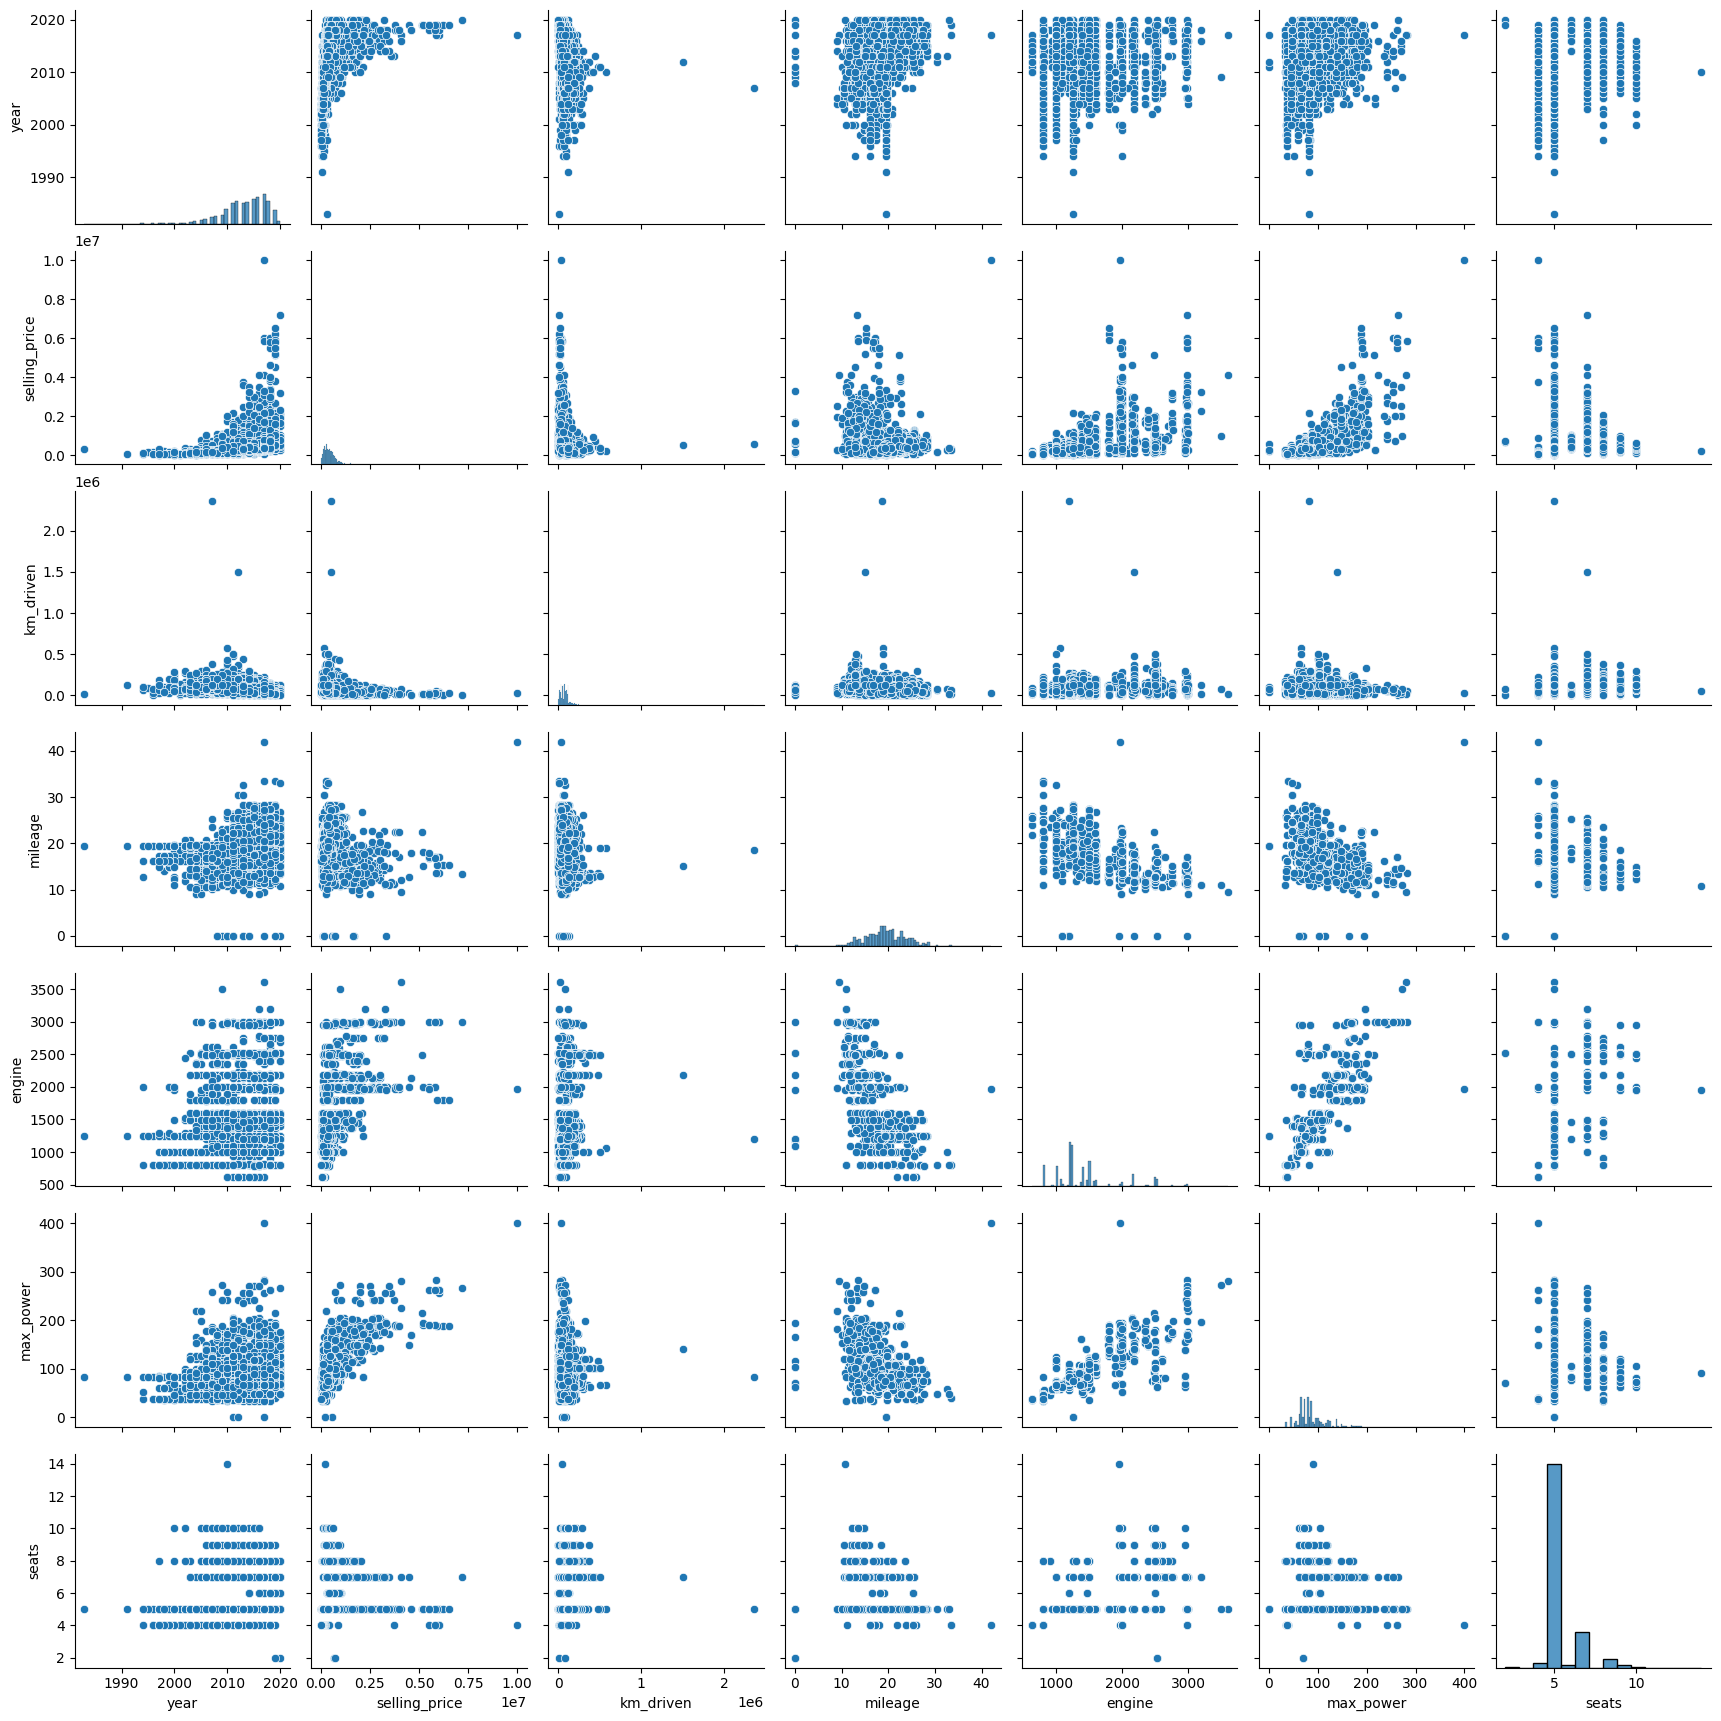

In [31]:
%matplotlib inline
sns.pairplot(df_train)
plt.show()

`1. Можно. Связь таких признаков year, mileage, engine, max_power, с ценой продажи заметна даже по визуализации. Можно предположить, что мощность двигателя, его объем и год выпуска положительно коррелируют с ценой, а километраж - отрицательно`

`1. Можно увидеть связь между объемом двигателя и мощностью, например. Также эти два показателя связаны с годом выпуска - в последние годы на рынке появляются модели с более мощными двигателями (однако малолитражки не исчезают с рынка)`

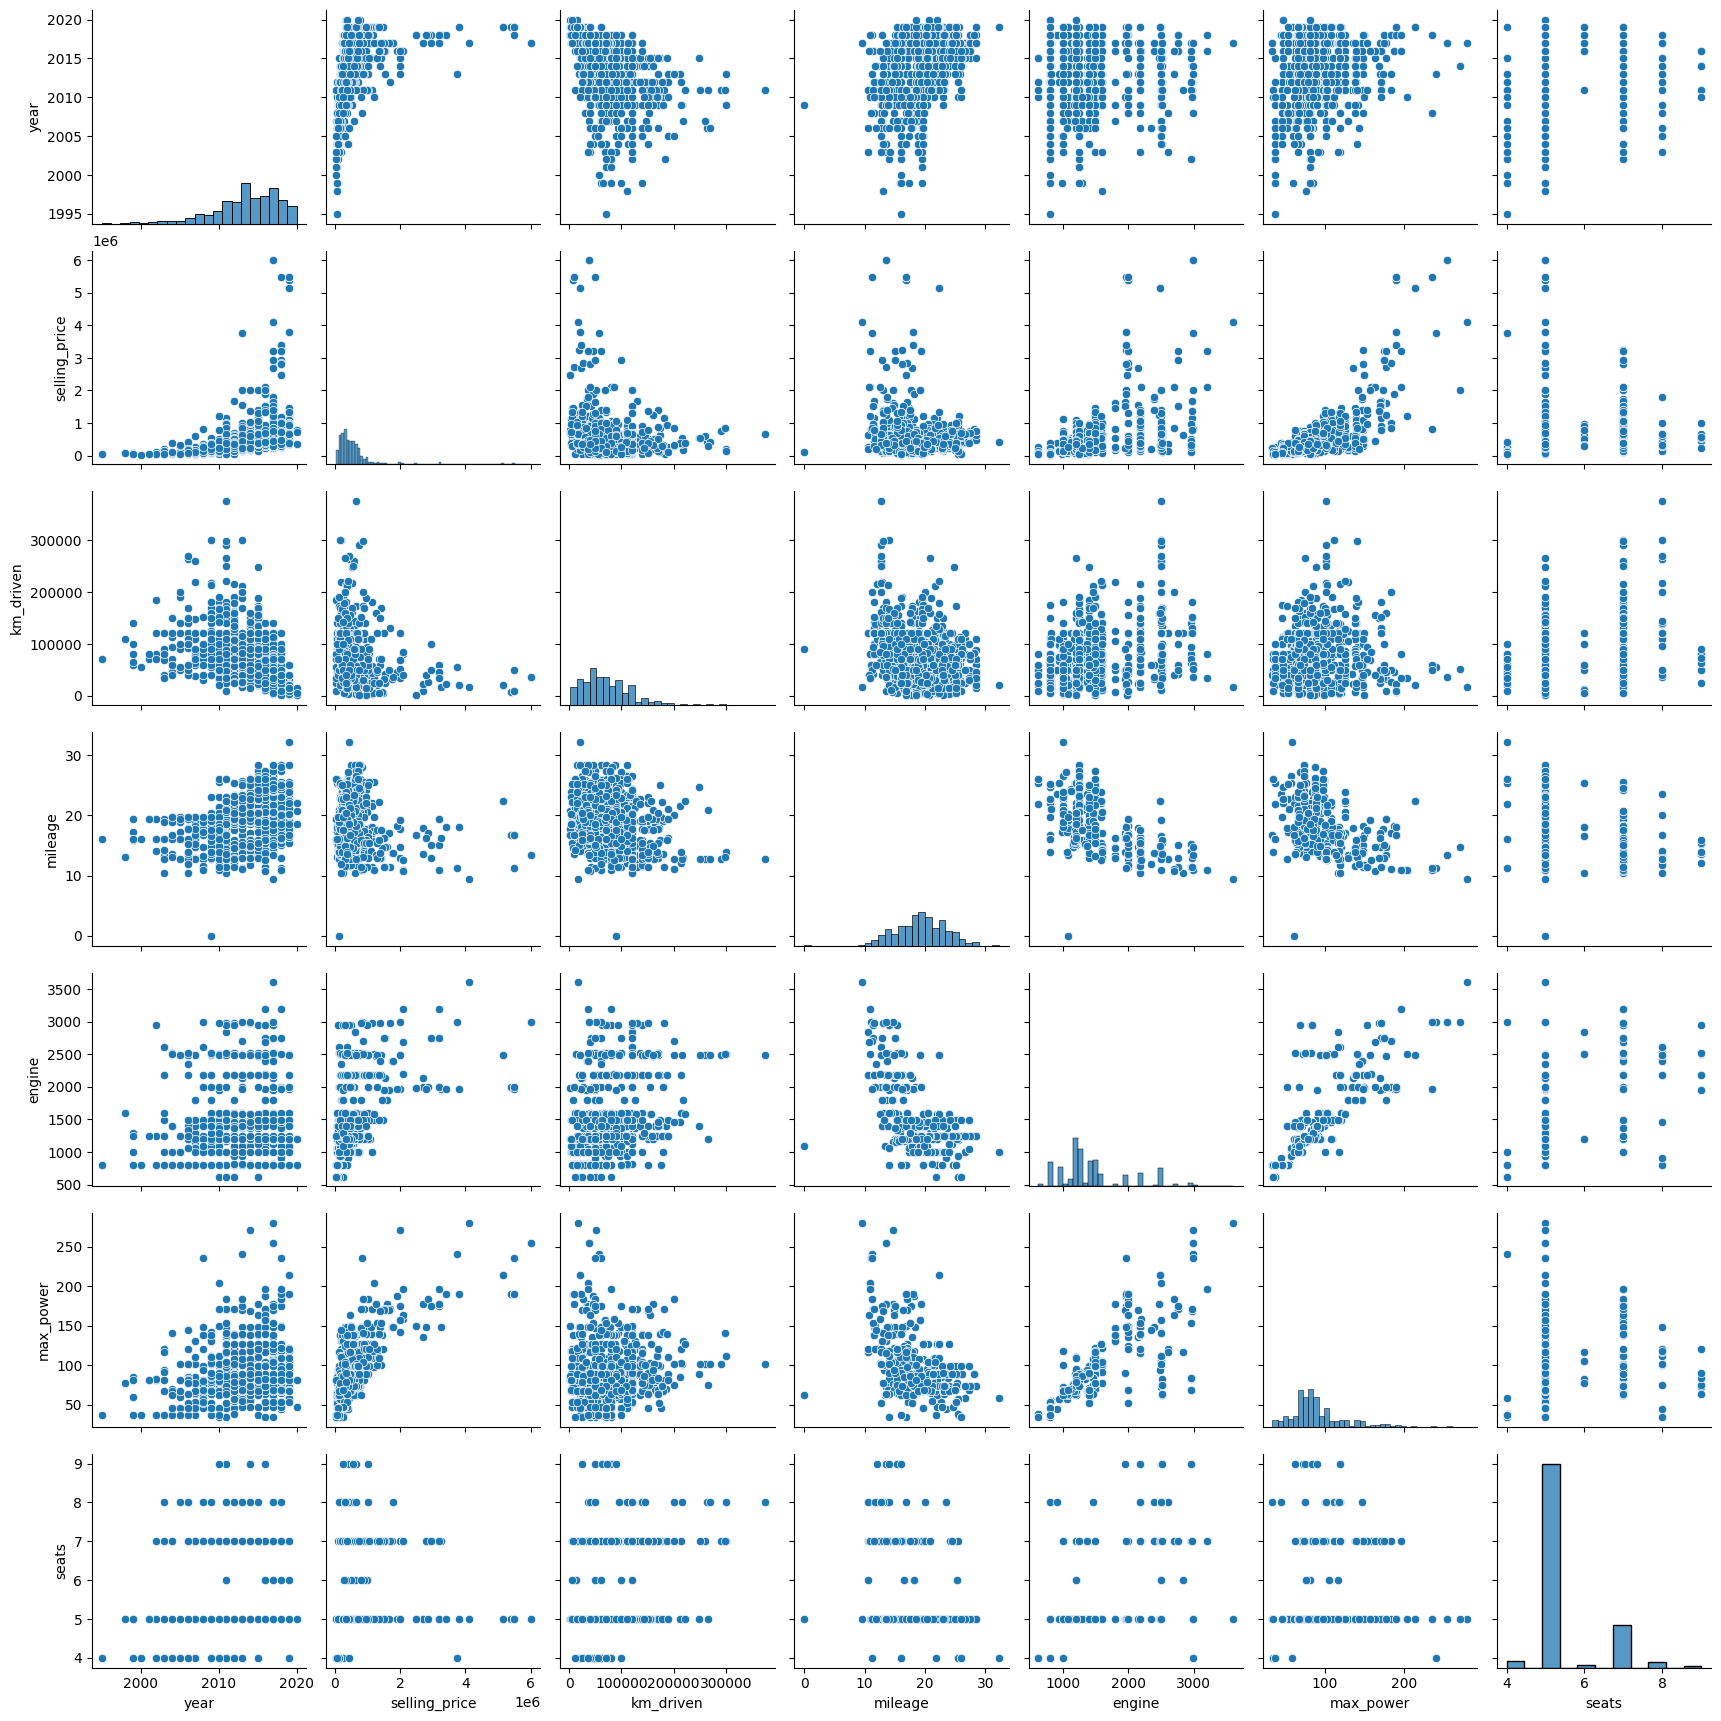

In [32]:
%matplotlib inline
sns.pairplot(df_test)
plt.show()

`В целом, формы распределений похожи`

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


In [33]:
corr = df_train.select_dtypes('number').corr()
corr

,year,selling_price,km_driven,mileage,engine,max_power,seats
year,1.000000,0.427279,-0.368966,0.340493,0.002819,0.156904,0.041178
selling_price,0.427279,1.000000,-0.164828,-0.105080,0.447672,0.692827,0.149953
km_driven,-0.368966,-0.164828,1.000000,-0.181925,0.229766,0.024579,0.192328
mileage,0.340493,-0.105080,-0.181925,1.000000,-0.573105,-0.373520,-0.451304
engine,0.002819,0.447672,0.229766,-0.573105,1.000000,0.681124,0.652172
max_power,0.156904,0.692827,0.024579,-0.373520,0.681124,1.000000,0.244123
seats,0.041178,0.149953,0.192328,-0.451304,0.652172,0.244123,1.000000


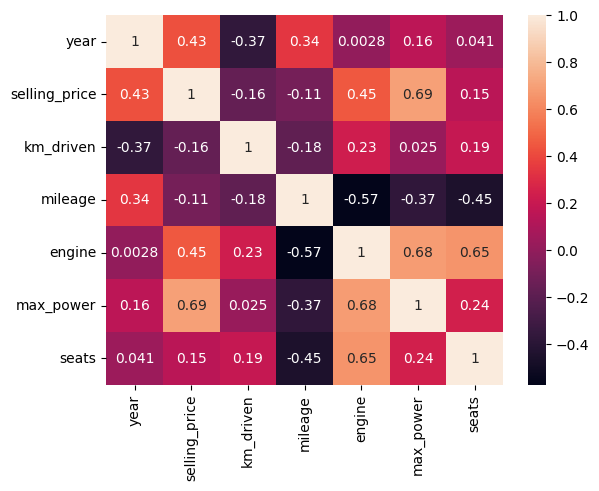

In [34]:
sns.heatmap(corr, annot=True)
plt.show()

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

`1. km_driven и max_power`

`2. Пары (selling_price, max_power), (engine, max_power) и (engine, seats) наиболее сильно кррелируют между собой`

`3. Не совсем - знак корреляции положительный, а сама она скорее слабая. Правильнее было бы сказать, что чем больше год, тем больше машина проехала к дате продажи. Заблуждение может возникнуть, если считать, что все машины были проданы в одно время, но такой информации у нас нет`

### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

In [35]:
# your code here

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [36]:
y_train = df_train.copy()['selling_price']
X_train = df_train.copy().select_dtypes('number').drop(columns=['selling_price'])

In [37]:
assert X_train.shape == (5840, 6)

In [38]:
y_test = df_test.copy()['selling_price']
X_test = df_test.copy().select_dtypes('number').drop(columns=['selling_price'])

In [39]:
assert X_test.shape == (1000, 6)

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

model = LinearRegression()
model.fit(X_train, y_train)

print(f"Train R2: {r2_score(y_train, model.predict(X_train))}")
print(f"Test R2: {r2_score(y_test, model.predict(X_test))}")
print(f"Train MSE: {MSE(y_train, model.predict(X_train))}")
print(f"Test MSE: {MSE(y_test, model.predict(X_test))}")

Train R2: 0.5922613746055916
Test R2: 0.5941416939423338
Train MSE: 116873522067.38197
Test MSE: 233298943864.99393


`По r2 можно сказать, что модель уже неплохо работает. MSE трудно интерпретировать, но занимательно, что mse на трейне в два раза ниже, чем на тесте, в то время как r2 на тесте оказался выше, чем на трейне.`

### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [41]:
from sklearn.preprocessing import StandardScaler

sscaler = StandardScaler()
X_train = sscaler.fit_transform(X_train)
X_test = sscaler.transform(X_test)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

print(f"Train R2: {r2_score(y_train, lr_model.predict(X_train))}")
print(f"Test R2: {r2_score(y_test, lr_model.predict(X_test))}")
print(f"Train MSE: {MSE(y_train, lr_model.predict(X_train))}")
print(f"Test MSE: {MSE(y_test, lr_model.predict(X_test))}")

Train R2: 0.5922613746055925
Test R2: 0.5941416939423425
Train MSE: 116873522067.38176
Test MSE: 233298943864.98895


### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [42]:
for coef, name in zip(lr_model.coef_, sscaler.feature_names_in_):
    print(f"{coef:>15.5f}  {name}")

   152769.52382  year
   -44160.91229  km_driven
    28866.51129  mileage
    61194.06736  engine
   322810.62419  max_power
   -23201.37573  seats


`Мощность`

### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [43]:
from sklearn.linear_model import Lasso

lasso_model = Lasso()
lasso_model.fit(X_train, y_train)

print(f"Train R2: {r2_score(y_train, lasso_model.predict(X_train))}")
print(f"Test R2: {r2_score(y_test, lasso_model.predict(X_test))}")
print(f"Train MSE: {MSE(y_train, lasso_model.predict(X_train))}")
print(f"Test MSE: {MSE(y_test, lasso_model.predict(X_test))}")

Train R2: 0.592261374570308
Test R2: 0.5941405270051752
Train MSE: 116873522077.49564
Test MSE: 233299614653.79535


In [44]:
lasso_model.coef_

array([152769.34124769, -44159.78396416,  28864.62904793,  61189.23533765,
       322811.50816311, -23198.4991645 ])

`Ничего не изменилось. Возможно, причина в том, что все признаки информативны`

### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [45]:
from sklearn.model_selection import GridSearchCV

gs = GridSearchCV(Lasso(), {'alpha':10**np.linspace(-1, 6, 36)}, scoring='r2', n_jobs=-1, cv=10)
gs.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-01, 1.58489319e-01, 2.51188643e-01, 3.98107171e-01,
       6.30957344e-01, 1.00000000e+00, 1.58489319e+00, 2.51188643e+00,
       3.98107171e+00, 6.30957344e+00, 1.00000000e+01, 1.58489319e+01,
       2.51188643e+01, 3.98107171e+01, 6.30957344e+01, 1.00000000e+02,
       1.58489319e+02, 2.51188643e+02, 3.98107171e+02, 6.30957344e+02,
       1.00000000e+03, 1.58489319e+03, 2.51188643e+03, 3.98107171e+03,
       6.30957344e+03, 1.00000000e+04, 1.58489319e+04, 2.51188643e+04,
       3.98107171e+04, 6.30957344e+04, 1.00000000e+05, 1.58489319e+05,
       2.51188643e+05, 3.98107171e+05, 6.30957344e+05, 1.00000000e+06])},
             scoring='r2')

In [46]:
gs.best_params_

{'alpha': 25118.864315095823}

In [47]:
gs.best_score_

0.5749997272562963

In [48]:
lasso_model = Lasso(alpha=25118.864)
lasso_model.fit(X_train, y_train)

print(f"Train R2: {r2_score(y_train, lasso_model.predict(X_train))}")
print(f"Test R2: {r2_score(y_test, lasso_model.predict(X_test))}")
print(f"Train MSE: {MSE(y_train, lasso_model.predict(X_train))}")
print(f"Test MSE: {MSE(y_test, lasso_model.predict(X_test))}")

Train R2: 0.5831999138747664
Test R2: 0.5661230864172773
Train MSE: 119470884114.36096
Test MSE: 249404839559.62262


In [49]:
for coef, name in zip(lasso_model.coef_, sscaler.feature_names_in_):
    print(f"{coef:>15.5f}  {name}")

   146669.12946  year
   -16956.35632  km_driven
        0.00000  mileage
        0.00000  engine
   323214.85297  max_power
       -0.00000  seats


`Грид серч обучил 360 моделей - по десять фолдов на каждый из 36 вариантов параметра. Лучший коэффициент: 25118.864. При таком коэффициенте зенулились параметры mileage, engine, seats`

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [50]:
from sklearn.linear_model import ElasticNet

gs = GridSearchCV(ElasticNet(), {'alpha':10**np.linspace(-1, 5, 31), 'l1_ratio': np.linspace(0.05, 0.95, 19)}, scoring='r2', n_jobs=-1, cv=10)
gs.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-01, 1.58489319e-01, 2.51188643e-01, 3.98107171e-01,
       6.30957344e-01, 1.00000000e+00, 1.58489319e+00, 2.51188643e+00,
       3.98107171e+00, 6.30957344e+00, 1.00000000e+01, 1.58489319e+01,
       2.51188643e+01, 3.98107171e+01, 6.30957344e+01, 1.00000000e+02,
       1.58489319e+02, 2.51188643e+02, 3.98107171e+02, 6.30957344e+02,
       1.00000000e+03, 1.58489319e+03, 2.51188643e+03, 3.98107171e+03,
       6.30957344e+03, 1.00000000e+04, 1.58489319e+04, 2.51188643e+04,
       3.98107171e+04, 6.30957344e+04, 1.00000000e+05]),
                         'l1_ratio': array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])},
             scoring='r2')

In [51]:
gs.best_params_

{'alpha': 0.15848931924611134, 'l1_ratio': 0.1}

In [52]:
gs.best_score_

0.5767733380334624

In [53]:
elasticnet_model = ElasticNet(alpha=0.15848931924611134, l1_ratio= 0.1)
elasticnet_model.fit(X_train, y_train)

print(f"Train R2: {r2_score(y_train, elasticnet_model.predict(X_train))}")
print(f"Test R2: {r2_score(y_test, elasticnet_model.predict(X_test))}")
print(f"Train MSE: {MSE(y_train, elasticnet_model.predict(X_train))}")
print(f"Test MSE: {MSE(y_test, elasticnet_model.predict(X_test))}")

Train R2: 0.5851477325612353
Test R2: 0.5630836700537123
Train MSE: 118912564602.64906
Test MSE: 251151982877.87457


`Гридчерч обучил 10*31*19 = 5890 моделей. Лучшие гиперпараметры отобразил выше`

# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


### **Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name`

In [54]:
# X_train_cat = df_train.drop(columns=['name', 'selling_price'])
# X_test_cat = df_test.drop(columns=['name', 'selling_price'])

В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

### **Бонус 0.5 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

In [55]:
# Можно оставить марку автомобиля, и закодировать one-hot
# Судя по всему, категорий будет не адски много, поэтому поступим так
df_train['name'].apply(lambda x: x.upper().split()[0]).unique()

array(['MARUTI', 'SKODA', 'HYUNDAI', 'TOYOTA', 'FORD', 'RENAULT',
       'MAHINDRA', 'HONDA', 'CHEVROLET', 'FIAT', 'DATSUN', 'TATA', 'JEEP',
       'MERCEDES-BENZ', 'MITSUBISHI', 'AUDI', 'VOLKSWAGEN', 'BMW',
       'NISSAN', 'LEXUS', 'JAGUAR', 'LAND', 'MG', 'VOLVO', 'DAEWOO',
       'KIA', 'FORCE', 'AMBASSADOR', 'ISUZU', 'PEUGEOT'], dtype=object)

In [56]:
X_train_cat = df_train.drop(columns=['selling_price'])
X_train_cat['name'] = X_train_cat['name'].apply(lambda x: x.upper().split()[0])
X_test_cat = df_test.drop(columns=['selling_price'])
X_test_cat['name'] = X_test_cat['name'].apply(lambda x: x.upper().split()[0])

In [57]:
# assert X_train_cat.shape == (5840, 10)
assert X_train_cat.shape == (5840, 11) #исправил ассерт

In [58]:
X_train_cat.describe(exclude='number')

,name,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840,5840
unique,30,4,3,2,5
top,MARUTI,Diesel,Individual,Manual,First Owner
freq,1804,3177,5223,5336,3603


### **Задание 15 (0.4 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [59]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import TransformerMixin
import numpy as np

class DataPreprocessor(TransformerMixin):

    def __init__(self, features_from_num_to_cat=None):
        self.features_from_num_to_cat = features_from_num_to_cat
        return

    def fit(self, X, y=None):
        X_cat = X.select_dtypes(exclude='number')
        X_num = X.select_dtypes(include='number')
        if self.features_from_num_to_cat:
            X_cat = pd.concat([X_cat, X_num[self.features_from_num_to_cat]], axis=1)
            X_num = X_num.drop(columns=self.features_from_num_to_cat)

        self.OHE = OneHotEncoder(drop='first', handle_unknown="ignore", sparse_output=False)
        self.OHE.fit(X_cat)

        self.SScaler = StandardScaler()
        self.SScaler.fit(X_num)

        self.feature_names_in_ = np.concatenate([self.OHE.feature_names_in_, self.SScaler.feature_names_in_], axis=0)
        return None

    def transform(self, X, y=None):
        X = X[self.feature_names_in_]
        X_cat = X.select_dtypes(exclude='number')
        X_num = X.select_dtypes(include='number')
        if self.features_from_num_to_cat:
            X_cat = pd.concat([X_cat, X_num[self.features_from_num_to_cat]], axis=1)
            X_num = X_num.drop(columns=self.features_from_num_to_cat)

        cat = self.OHE.transform(X_cat)
        num = self.SScaler.transform(X_num)

        return np.concatenate([cat, num], axis=1)

    def fit_transform(self, X, y=None, **fit_params):
        self.fit(X, y)
        Xt = self.transform(X, y)
        return Xt

In [60]:
processor = DataPreprocessor(features_from_num_to_cat=['seats'])
# y_train = df_train.copy()['selling_price']
X_train_t = df_train.copy().drop(columns=['selling_price'])
X_train_t['name'] = X_train_t['name'].apply(lambda x: x.upper().split()[0])

# y_test = df_test.copy()['selling_price']
X_test_t = df_test.copy().drop(columns=['selling_price'])
X_test_t['name'] = X_test_t['name'].apply(lambda x: x.upper().split()[0])

processor.fit(X_train_t)
X_train_t = processor.transform(X_train_t)
X_test_t = processor.transform(X_test_t)

/home/timur/Документы/main_venv/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [61]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

gs = GridSearchCV(Ridge(), {'alpha':10**np.linspace(-1, 5, 31)}, scoring='r2', n_jobs=-1, cv=10)
gs.fit(X_train_t, y_train)

GridSearchCV(cv=10, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-01, 1.58489319e-01, 2.51188643e-01, 3.98107171e-01,
       6.30957344e-01, 1.00000000e+00, 1.58489319e+00, 2.51188643e+00,
       3.98107171e+00, 6.30957344e+00, 1.00000000e+01, 1.58489319e+01,
       2.51188643e+01, 3.98107171e+01, 6.30957344e+01, 1.00000000e+02,
       1.58489319e+02, 2.51188643e+02, 3.98107171e+02, 6.30957344e+02,
       1.00000000e+03, 1.58489319e+03, 2.51188643e+03, 3.98107171e+03,
       6.30957344e+03, 1.00000000e+04, 1.58489319e+04, 2.51188643e+04,
       3.98107171e+04, 6.30957344e+04, 1.00000000e+05])},
             scoring='r2')

In [62]:
gs.best_params_

{'alpha': 2.511886431509581}

In [63]:
gs.best_score_

0.7111221307020588

In [64]:
ridge_model = Ridge(alpha=2.5118)
ridge_model.fit(X_train_t, y_train)

print(f"Train R2: {r2_score(y_train, ridge_model.predict(X_train_t))}")
print(f"Test R2: {r2_score(y_test, ridge_model.predict(X_test_t))}")
print(f"Train MSE: {MSE(y_train, ridge_model.predict(X_train_t))}")
print(f"Test MSE: {MSE(y_test, ridge_model.predict(X_test_t))}")

Train R2: 0.764729770005998
Test R2: 0.7718144767866887
Train MSE: 67437467790.55854
Test MSE: 131167554726.31047


`Да, удалось существенно улучшить качество модели`

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [65]:
def business_metric(y_true, y_pred):
    return np.where(np.abs((1 - y_pred/y_true*1)) <= 0.1, 1, 0).sum()/y_true.shape[0]

print(f"LinearRegression: {business_metric(y_test, lr_model.predict(X_test))}")
print(f"Lasso: {business_metric(y_test, lasso_model.predict(X_test))}")
print(f"ElasticNet: {business_metric(y_test, elasticnet_model.predict(X_test))}")
print(f"Ridge with categorical features: {business_metric(y_test, ridge_model.predict(X_test_t))}")

LinearRegression: 0.227
Lasso: 0.233
ElasticNet: 0.244
Ridge with categorical features: 0.308


`Ridge регрессия с категориальными фичами ожидаемо дала лучший результат`

# **Часть 5 (3 балла) | Реализация сервиса на FastAPI**

### **Задание 18 (3 балла)**


Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [66]:
# Обучу и сохраню пайплайн для использования в сервисе
# class DataPreprocessor(TransformerMixin):

from HW1_model import DataPreprocessor, preprocess_dataframe

In [67]:
from sklearn.pipeline import Pipeline
pipe = Pipeline(
    steps = [
        ('features_encoding', DataPreprocessor(features_from_num_to_cat=['seats'])),
        ('ridge_regression', Ridge(alpha=2.5118))
    ],
    verbose=False
)

y_train = df_train.copy()['selling_price']
X_train_t = df_train.copy().drop(columns=['selling_price'])
X_train_t['name'] = X_train_t['name'].apply(lambda x: x.upper().split()[0])

y_test = df_test.copy()['selling_price']
X_test_t = df_test.copy().drop(columns=['selling_price'])
X_test_t['name'] = X_test_t['name'].apply(lambda x: x.upper().split()[0])

pipe.fit(X_train_t, y_train)

print(f"Train R2: {r2_score(y_train, pipe.predict(X_train_t))}")
print(f"Test R2: {r2_score(y_test, pipe.predict(X_test_t))}")
print(f"Train MSE: {MSE(y_train, pipe.predict(X_train_t))}")
print(f"Test MSE: {MSE(y_test, pipe.predict(X_test_t))}")

Train R2: 0.764729770005998
Test R2: 0.7718144767866887
Train MSE: 67437467790.55854
Test MSE: 131167554726.31047


/home/timur/Документы/main_venv/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/timur/Документы/main_venv/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [68]:
import pickle
with open('cars_pipeline.pkl', 'wb') as file:
    pickle.dump(pipe, file, protocol=-1)

In [17]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


# @app.post("/predict_item")
# def predict_item(item: Item) -> float:
#     return ...


# @app.post("/predict_items")
# def predict_items(items: List[Item]) -> List[float]:
#     return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 19 (1 балл)**


**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* сохраненный дашборд в любом формате
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией
3. Просматривает ноутбук с DS-частью
4. Заглядывает в код сервиса
5. Хвалит

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой!

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/XbnpCTg)

</details>

